In [53]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
import numpy as np

In [22]:
%matplotlib inline

In [4]:
# tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'cs_restaurants',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adr

In [18]:
mnist_train_ds = tfds.load(
    "mnist",
    split="train",
    batch_size=-1,      # load as a single batch
    as_supervised=True
)

In [17]:
image_train, label_train = tfds.as_numpy(mnist_ds)

image_train.shape, label_train.shape

((60000, 28, 28, 1), (60000,))

In [19]:
image_test, label_test = tfds.as_numpy(
    tfds.load(
        "mnist",
        split="test",
        batch_size=-1,
        as_supervised=True
    )
)

In [20]:
image_train_scaled = image_train / 255.0
image_test_scaled = image_test / 255.0

In [41]:
plt.grid?

Signature: plt.grid(visible=None, which='major', axis='both', **kwargs)
Docstring:
Configure the grid lines.

Parameters
----------
visible : bool or None, optional
    Whether to show the grid lines.  If any *kwargs* are supplied, it
    is assumed you want the grid on and *visible* will be set to True.

    If *visible* is *None* and there are no *kwargs*, this toggles the
    visibility of the lines.

which : {'major', 'minor', 'both'}, optional
    The grid lines to apply the changes on.

axis : {'both', 'x', 'y'}, optional
    The axis to apply the changes on.

**kwargs : `.Line2D` properties
    Define the line properties of the grid, e.g.::

        grid(color='r', linestyle='-', linewidth=2)

    Valid keyword arguments are:

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: scalar or None
    animated: bool
    antialiased or aa: bool
    clip_box: `.Bbox`
    clip_on: bool
    clip_

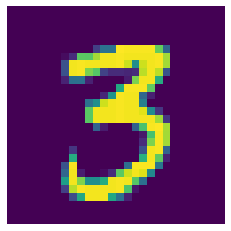

In [52]:
plt.imshow(image_train_scaled[np.random.randint(60000)])
plt.axis("off")
plt.show()

In [55]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (image_train_scaled, label_train)
)

test_ds = tf.data.Dataset.from_tensor_slices(
    (image_test_scaled, label_test)
)

In [56]:
BATCH_SIZE = 128
SHUFFLE_SIZE = 5000

In [66]:
train_ds_fmt = (
    train_ds
    .shuffle(SHUFFLE_SIZE)    
    .batch(BATCH_SIZE)
    .prefetch(1)
)
test_ds_fmt = (
    test_ds
    .batch(BATCH_SIZE)
    .prefetch(1)
)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.metrics import SparseCategoricalCrossentropy

In [97]:
img_shape = train_ds_fmt.take(1).as_numpy_iterator().next()[0].shape[1:]

img_shape

(28, 28, 1)

In [110]:
np.random.seed(0)
tf.random.set_seed(0)
tf.keras.backend.clear_session()

In [111]:
model = Sequential([
    Flatten(input_shape=img_shape),
    Dense(128, activation="relu"),
    Dropout(0.4),
    Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [116]:
EPOCHS = 10

history = model.fit(
    train_ds_fmt,
    epochs=EPOCHS,
    verbose=1,
    validation_data=test_ds_fmt,
)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4684 - accuracy: 0.8627 - sparse_categorical_crossentropy: 0.0000e+00 - val_loss: 0.2064 - val_accuracy: 0.9392 - val_sparse_categorical_crossentropy: 0.0000e+00
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2369 - accuracy: 0.9309 - sparse_categorical_crossentropy: 0.0000e+00 - val_loss: 0.1481 - val_accuracy: 0.9572 - val_sparse_categorical_crossentropy: 0.0000e+00
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1837 - accuracy: 0.9463 - sparse_categorical_crossentropy: 0.0000e+00 - val_loss: 0.1206 - val_accuracy: 0.9635 - val_sparse_categorical_crossentropy: 0.0000e+00
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1555 - accuracy: 0.9532 - sparse_categorical_crossentropy: 0.0000e+00 - val_loss: 0.1061 - val_accuracy: 0.9682 - val_sparse_categorical_crossentropy: 0.0000e+00
Epoch 5/10
469/469 [============================